# Binary Search

Before attempting to analyze the algorithm using Big-Oh we're going to first: 

* Provide an Overview of the Binary Search Algorithm

* Discuss How Binary Search Works

* Visualize Binary Search

* Look at a Recursive Implementation

## Overview of Binary Search

* Binary search consists of searching a <font color=Red>sorted list</font> for a <font color=Red>given target value</font> by first <font color=Red>identifying the indices of the lowest and highest values</font> in the list which are then used to <font color=Red>calculate the index of the middle value</font> of the list.

* If the target value <font color=Red>does not</font> equal the middle value, then the search interval is <font color=Red>divided in at least half</font> by adjusting either the index of the lowest or highest value depending on if the target value was <font color=Red>greater than</font> or <font color=Red>less than</font> the middle value.

* The index of the middle value is then <font color=Red>recalculated</font> using either the updated low index with the current high index or the updated high index with the current low index.     

* This process is <font color=Red>repeated until</font> the <font color=Red>target is found</font> or the <font color=Red>search interval is empty</font>.

## How Binary Search Works

* <font color=Red>Initially</font>, the search interval covers the <font color=Red>whole list</font> where the <font color=Red>low value</font> is at <font color=Red>index $0$</font> and the <font color=Red>high value</font> is at <font color=Red>index $n - 1$</font> where $n$ is the input size (assuming the list is sorted in ascending order).

* The middle index is then calculated using the following formula:<br><br>
$$midIndex = \Bigl\lfloor\frac{lowIndex + highIndex}{2}\Bigr\rfloor$$<br>
where $\lfloor\rfloor$ is the floor function which takes as input a real number, say $x$ and gives as output the greatest integer less than or equal to $x$.
  
* After identifying the low index and high index and calculating the middle index we need to consider three possible cases:

  1. If the target value is <font color=Red>equal to</font> the the middle value, then the target value is present in the list, and the search will terminate successfully.

  2. If the target value is <font color=Red>greater than</font> the middle value, then we can ignore the values to the left of and including the middle value and focus on the values to the right of the middle value. 

     * So, the low index is 
       $$lowIndex = midIndex + 1$$
       and the high index remains the same.
       
     * The middle index is then recalcuated using the updated low index and the current high index, and the three possible cases are then considered again. 

  3. If the target value is <font color=Red>less than</font> the middle value, then we can ignore the values to the right of and including the middle value and focus on the values to the left of the middle value. 

     * So, the high index is 
       $$highIndex = midIndex - 1$$
       and the low index remains the same.
       
     * The middle index is then recalculated using the updated high index, and the current low index and the three possible cases are then considered again.

* Once the $lowIndex > highIndex$ then the search will terminate and the target is not in the list since the search interval $[low, high]$ is empty.

Note (1): When calculating the middle index we didn't take into account the possibility of integer overflow because Python integers have arbitrary precision. However, if you're using a Python library that uses C-style fixed precision integers like NumPy or a different programming language that uses fixed precision integers, then integer overflow can occur. To prevent integer overflow when calculating the middle index an offset is calculated first and then its added to the lower boundary, i.e., $midIndex = lowIndex + \Bigl\lfloor\frac{highIndex - lowIndex}{2}\Bigr\rfloor$

Note (2): Other common pitfalls of implementing binary search include: stack overflow caused by an infinite recursion error, expecting deterministic results when duplicate elements are present, and floating-point rounding. All of these as well as integer overflow will be discussed in more detail in a different notebook.

## Visualizing Binary Search

* Now, we're going to look at <font color=Red>two example lists</font> to help us visualize how binary search works when the target is present and when it's not present on a list with an <font color=Red>odd</font> number of elements and a list with an <font color=Red>even</font> number of elements. 

  * List $A$ will have an <font color=Red>odd</font> number of elements.
  * List $B$ will have an <font color=Red>even</font> number of elements.
<br><br>
* The low, high, and middle values are highlighted in blue and are being denoted with arrows, and the numbers above the elements represent the indices.

### 1. Let list $A = [1, 4, 7, 9, 12, 14, 18]$ and the $target = 7$.

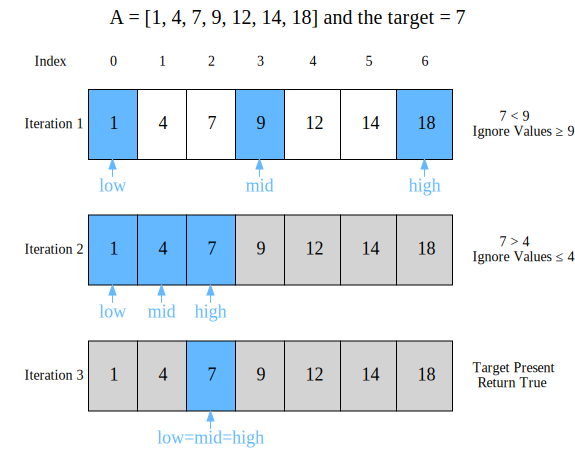

In [1]:
from graphviz import Digraph

# Create Digraph object and set attributes for all nodes & edges which will persist unless 
# a specific attribute set here is updated
s = Digraph('structs', node_attr={'shape': 'plain', 'fontsize': '18'}, 
            edge_attr={'dir': 'back', 'color': 'steelblue1'})

# Set the separation between ranks, i.e., the nodes to be 0.25 inches, set the label of the graph
# to be displayed at the top, adjust the label fontsize, and declare the label.
s.attr(ranksep='0.25', labelloc='t', 
       label='A = [1, 4, 7, 9, 12, 14, 18] and the target = 7', fontsize='20')

# Add node for index and iteration 1 table
s.node('iteration1', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Index</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">0</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">1</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">2</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">3</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">4</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">5</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">6</FONT></TD>
  </TR>
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 1</FONT></TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">1</TD>
    <TD>4</TD>
    <TD>7</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">9</TD>
    <TD>12</TD>
    <TD>14</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">7 &lt; 9 <BR/> Ignore Values &ge; 9</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 2 table
s.node('iteration2', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 2</FONT></TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">1</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">4</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">7</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD BGCOLOR="lightgray">14</TD>
    <TD BGCOLOR="lightgray">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">7 &gt; 4 <BR/> Ignore Values &le; 4</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 3 table
s.node('iteration3', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 3</FONT></TD>
    <TD PORT="index0" BGCOLOR="lightgray">1</TD>
    <TD BGCOLOR="lightgray">4</TD>
    <TD PORT="lowMidHighValue" BGCOLOR="steelblue1">7</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD BGCOLOR="lightgray">14</TD>
    <TD BGCOLOR="lightgray">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">Target Present <BR/> Return True</FONT></TD>
  </TR>
</TABLE>>''')

# Update the node fontcolor from the default value of black to steelblue1
s.attr('node', fontcolor='steelblue1')

# Add nodes for iteration 1 labels
s.node('iteration1LowNode', label='low')
s.node('iteration1MidNode', label='mid')
s.node('iteration1HighNode', label='high')

# Add nodes for iteration 2 labels
s.node('iteration2LowNode', label='low')
s.node('iteration2MidNode', label='mid')
s.node('iteration2HighNode', label='high')

# Add node for iteration 3 label
s.node('iteration3LowMidHighNode', label='low=mid=high')

# Add edges for each iteration's labels
s.edges([('iteration1:lowValue', 'iteration1LowNode'), 
         ('iteration1:midValue', 'iteration1MidNode'),
         ('iteration1:highValue', 'iteration1HighNode'),
         ('iteration2:lowValue', 'iteration2LowNode'),
         ('iteration2:midValue', 'iteration2MidNode'),
         ('iteration2:highValue', 'iteration2HighNode'),
         ('iteration3:lowMidHighValue', 'iteration3LowMidHighNode')])

# Add invisible edge between iteration 1 low label & the first value in iteration 2 table
# to align iteration 1 table with iteration 2 table
s.edge('iteration1LowNode', 'iteration2:lowValue', style='invis')

# Add invisible edge between iteration 2 low label & the first value in iteration 3 table
# to align iteration 2 table with iteration 3 table
s.edge('iteration2LowNode', 'iteration3:index0', style='invis')

# Visualize the graph
s

  * The first iteration consists of identifying the initial low and high indices of $A$ which are $lowIndex = 0$ and $highIndex = n - 1 = 7 - 1 = 6$ and the middle index is calculated using the formula<br><br>
$$midIndex = \Bigl\lfloor\frac{lowIndex + highIndex}{2}\Bigr\rfloor = \Bigl\lfloor\frac{0 + 6}{2}\Bigr\rfloor = \Bigl\lfloor3\Bigr\rfloor = 3$$<br>
  * Now, since the $target < A[midIndex]$ because $7 < A[3] = 9$, the values to the right of and including the current middle value will be ignored in the next iteration by recalculating the high index using the formula<br><br>
$$highIndex = midIndex - 1 = 3 - 1 = 2$$<br>
  * During the second iteration the low and high indices are $lowIndex = 0$ and $highIndex = 2$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{0 + 2}{2}\Bigr\rfloor = \Bigl\lfloor1\Bigr\rfloor = 1$$<br>
  * Since the $target > A[midIndex]$ because $7 > A[1] = 4$, the values to the left of and including the current middle value will be ignored in the next iteration by recalculating the low index using the formula<br><br>
$$lowIndex = midIndex + 1 = 1 + 1 = 2$$<br>
  * During the third iteration the low and high indices are $lowIndex = 2$ and $highIndex = 2$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{2 + 2}{2}\Bigr\rfloor = \Bigl\lfloor2\Bigr\rfloor = 2$$<br>
  * Since the $target = A[midIndex]$ because $A[2] = 7$, the target value was present in the list and the search terminates successfully.

### 2. Now, we'll use list $A$ again, but this time we'll let the $target = 10$.

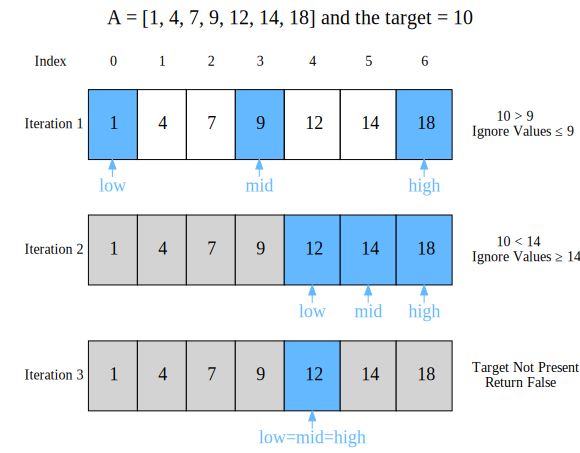

In [2]:
from graphviz import Digraph

# Create Digraph object and set attributes for all nodes & edges which will persist unless 
# a specific attribute set here is updated
s = Digraph('structs', node_attr={'shape': 'plain', 'fontsize': '18'}, 
            edge_attr={'dir': 'back', 'color': 'steelblue1'})

# Set the separation between ranks, i.e., the nodes to be 0.25 inches, set the label of the graph
# to be displayed at the top, adjust the label fontsize, and declare the label.
s.attr(ranksep='0.25', labelloc='t', 
       label='A = [1, 4, 7, 9, 12, 14, 18] and the target = 10', fontsize='20')

# Add node for index and iteration 1 table
s.node('iteration1', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Index</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">0</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">1</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">2</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">3</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">4</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">5</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">6</FONT></TD>
  </TR>
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 1</FONT></TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">1</TD>
    <TD>4</TD>
    <TD>7</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">9</TD>
    <TD>12</TD>
    <TD>14</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">10 &gt; 9 <BR/> Ignore Values &le; 9</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 2 table
s.node('iteration2', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 2</FONT></TD>
    <TD PORT="index0" BGCOLOR="lightgray">1</TD>
    <TD BGCOLOR="lightgray">4</TD>
    <TD BGCOLOR="lightgray">7</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">12</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">14</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">10 &lt; 14 <BR/> Ignore Values &ge; 14</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 3 table
s.node('iteration3', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 3</FONT></TD>
    <TD BGCOLOR="lightgray">1</TD>
    <TD BGCOLOR="lightgray">4</TD>
    <TD BGCOLOR="lightgray">7</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD PORT="lowMidHighValue" BGCOLOR="steelblue1">12</TD>
    <TD BGCOLOR="lightgray">14</TD>
    <TD PORT="index6" BGCOLOR="lightgray">18</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">Target Not Present <BR/> Return False</FONT></TD>
  </TR>
</TABLE>>''')

# Update the node fontcolor from the default value of black to steelblue1
s.attr('node', fontcolor='steelblue1')

# Add nodes for iteration 1 labels
s.node('iteration1LowNode', label='low')
s.node('iteration1MidNode', label='mid')
s.node('iteration1HighNode', label='high')

# Add nodes for iteration 2 labels
s.node('iteration2LowNode', label='low')
s.node('iteration2MidNode', label='mid')
s.node('iteration2HighNode', label='high')

# Add node for iteration 3 label
s.node('iteration3LowMidHighNode', label='low=mid=high')

# Add edges for each iteration's labels
s.edges([('iteration1:lowValue', 'iteration1LowNode'), 
         ('iteration1:midValue', 'iteration1MidNode'),
         ('iteration1:highValue', 'iteration1HighNode'),
         ('iteration2:lowValue', 'iteration2LowNode'),
         ('iteration2:midValue', 'iteration2MidNode'),
         ('iteration2:highValue', 'iteration2HighNode'),
         ('iteration3:lowMidHighValue', 'iteration3LowMidHighNode')])

# Add invisible edge between iteration 1 low label & the first value in iteration 2 table
# to align iteration 1 table with iteration 2 table
s.edge('iteration1LowNode', 'iteration2:index0', style='invis')

# Add invisible edge between iteration 2 high label & the last value in iteration 3 table 
# to align iteration 2 table with iteration 3 table
s.edge('iteration2HighNode', 'iteration3:index6', style='invis')

# Visualize the graph
s

  * Since the list is the same as the previous example the initial low and high indices are the same as the previous example, i.e., $lowIndex = 0$ and $highIndex = 6$ which means the initial middle index is also the same, i.e., $midIndex = 3$.<br><br>
  * The $target > A[midIndex]$ because $10 > A[3] = 9$, so the values to the left of and including the current middle value will be ignored in the next iteration by recalculating the low index using the formula<br><br>
$$lowIndex = midIndex + 1 = 3 + 1 = 4$$<br>
  * During the second iteration the low and high indices are $lowIndex = 4$ and $highIndex = 6$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{4 + 6}{2}\Bigr\rfloor = \Bigl\lfloor5\Bigr\rfloor = 5$$<br>
  * Since the $target < A[midIndex]$ because $10 < A[5] = 14$, the values to the right of and including the current middle value will be ignored in the next iteration by recalculating the high index using the formula<br><br>
$$highIndex = midIndex - 1 = 5 - 1 = 4$$<br>
  * During the third iteration the low and high indices are $lowIndex = 4$ and $highIndex = 4$ and the middle index is recalculated to be<br><br>
$$midIndex = \Bigl\lfloor\frac{4 + 4}{2}\Bigr\rfloor = \Bigl\lfloor4\Bigr\rfloor = 4$$<br>
  * Since the $target < A[midIndex]$ because 10 < $A[4] = 12$, the high index will be recalculated to be<br><br>
$$highIndex = midIndex - 1 = 4 - 1 = 3$$<br>
  * Now the $lowIndex > highIndex$ because $4 > 3$, so the search will terminate without finding the target since the search interval $[low, high]$ is empty.

### 3. Let list $B = [2, 5, 9, 12, 15, 18, 20, 25]$ and the $target = 25$.

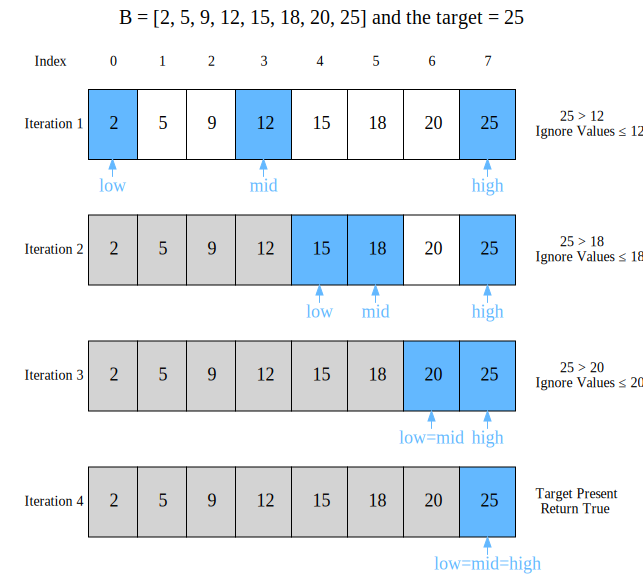

In [3]:
from graphviz import Digraph

# Create Digraph object and set attributes for all nodes & edges which will persist unless 
# a specific attribute set here is updated
s = Digraph('structs', node_attr={'shape': 'plain', 'fontsize': '18'}, 
            edge_attr={'dir': 'back', 'color': 'steelblue1'})

# Set the separation between ranks, i.e., the nodes to be 0.25 inches, set the label of the graph
# to be displayed at the top, adjust the label fontsize, and declare the label.
s.attr(ranksep='0.25', labelloc='t', 
       label='B = [2, 5, 9, 12, 15, 18, 20, 25] and the target = 25', fontsize='20')

# Add node for index and iteration 1 table
s.node('iteration1', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Index</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">0</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">1</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">2</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">3</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">4</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">5</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">6</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">7</FONT></TD>
  </TR>
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 1</FONT></TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">2</TD>
    <TD>5</TD>
    <TD>9</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">12</TD>
    <TD>15</TD>
    <TD>18</TD>
    <TD>20</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">25 &gt; 12 <BR/> Ignore Values &le; 12</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 2 table
s.node('iteration2', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 2</FONT></TD>
    <TD BGCOLOR="lightgray">2</TD>
    <TD BGCOLOR="lightgray">5</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">15</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">18</TD>
    <TD>20</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">25 &gt; 18 <BR/> Ignore Values &le; 18</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 3 table
s.node('iteration3', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 3</FONT></TD>
    <TD BGCOLOR="lightgray">2</TD>
    <TD BGCOLOR="lightgray">5</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD BGCOLOR="lightgray">15</TD>
    <TD BGCOLOR="lightgray">18</TD>
    <TD PORT="lowMidValue" BGCOLOR="steelblue1">20</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">25 &gt; 20 <BR/> Ignore Values &le; 20</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 4 table
s.node('iteration4', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 4</FONT></TD>
    <TD BGCOLOR="lightgray">2</TD>
    <TD BGCOLOR="lightgray">5</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD BGCOLOR="lightgray">15</TD>
    <TD BGCOLOR="lightgray">18</TD>
    <TD BGCOLOR="lightgray">20</TD>
    <TD PORT="lowMidHighValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">Target Present <BR/> Return True</FONT></TD>
  </TR>
</TABLE>>''')

# Update the node fontcolor from the default value of black to steelblue1
s.attr('node', fontcolor='steelblue1')

# Add nodes for iteration 1 labels
s.node('iteration1LowNode', label='low')
s.node('iteration1MidNode', label='mid')
s.node('iteration1HighNode', label='high')

# Add nodes for iteration 2 labels
s.node('iteration2LowNode', label='low')
s.node('iteration2MidNode', label='mid')
s.node('iteration2HighNode', label='high')

# Add nodes for iteration 3 label
s.node('iteration3LowMidNode', label='low=mid')
s.node('iteration3HighNode', label='high')

# Add node for iteration 4 label
s.node('iteration4LowMidHighNode', label='low=mid=high')

# Add edges for each iteration's labels
s.edges([('iteration1:lowValue', 'iteration1LowNode'), 
         ('iteration1:midValue', 'iteration1MidNode'),
         ('iteration1:highValue', 'iteration1HighNode'),
         ('iteration2:lowValue', 'iteration2LowNode'),
         ('iteration2:midValue', 'iteration2MidNode'),
         ('iteration2:highValue', 'iteration2HighNode'),
         ('iteration3:lowMidValue', 'iteration3LowMidNode'),
         ('iteration3:highValue', 'iteration3HighNode'),
         ('iteration4:lowMidHighValue', 'iteration4LowMidHighNode')])

# Add invisible edge between iteration 1 high label & the last value in iteration 2 table
# to align iteration 1 table with iteration 2 table
s.edge('iteration1HighNode', 'iteration2:highValue', style='invis')

# Add invisible edge between iteration 2 high label & the last value in iteration 3 table 
# to align iteration 2 table with iteration 3 table
s.edge('iteration2HighNode', 'iteration3:highValue', style='invis')

# Add invisible edge between iteration 3 high label & the last value in iteration 4 table 
# to align iteration 3 table with iteration 4 table
s.edge('iteration3HighNode', 'iteration4:lowMidHighValue', style='invis')

# Visualize the graph
s

  * The initial low and high indices of $A$ are $lowIndex = 0$ and $highIndex = n - 1 = 8 - 1 = 7$ and the middle index is calculated to be<br><br>
$$midIndex = \Bigl\lfloor\frac{lowIndex + highIndex}{2}\Bigr\rfloor = \Bigl\lfloor\frac{0 + 7}{2}\Bigr\rfloor = \Bigl\lfloor3.5\Bigr\rfloor = 3$$<br>
  * Now, since the $target > A[midIndex]$ because $25 > A[3] = 12$, the values to the left of and including the current middle value will be ignored in the next iteration by recalculating the low index to be<br><br>
$$lowIndex = midIndex + 1 = 3 + 1 = 4$$<br>
  * During the second iteration the low and high indices are $lowIndex = 4$ and $highIndex = 7$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{4 + 7}{2}\Bigr\rfloor = \Bigl\lfloor5.5\Bigr\rfloor = 5$$<br>
  * Since the $target > A[midIndex]$ because $25 > A[5] = 18$, the values to the left of and including the current middle value will be ignored in the next iteration by recalculating the low index to be<br><br>
$$lowIndex = midIndex + 1 = 5 + 1 = 6$$<br>
  * During the third iteration the low and high indices are $lowIndex = 6$ and $highIndex = 7$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{6 + 7}{2}\Bigr\rfloor = \Bigl\lfloor6.5\Bigr\rfloor = 6$$<br>
  * Once again the $target > A[midIndex]$ because $25 > A[6] = 20$, so the values to the left of and including the current middle value will be ignored again in the next iteration by recalculating the low index to be<br><br>
$$lowIndex = midIndex + 1 = 6 + 1 = 7$$<br>
  * During the fourth iteration the low and high indices are $lowIndex = 7$ and $highIndex = 7$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{7 + 7}{2}\Bigr\rfloor = \Bigl\lfloor7\Bigr\rfloor = 7$$<br>
  * Since the $target = A[midIndex]$ because $A[7] = 25$, the target value was present in the list and the search terminates successfully.

### 4. We'll use list $B$ again, but this time we'll let the $target = 16$.

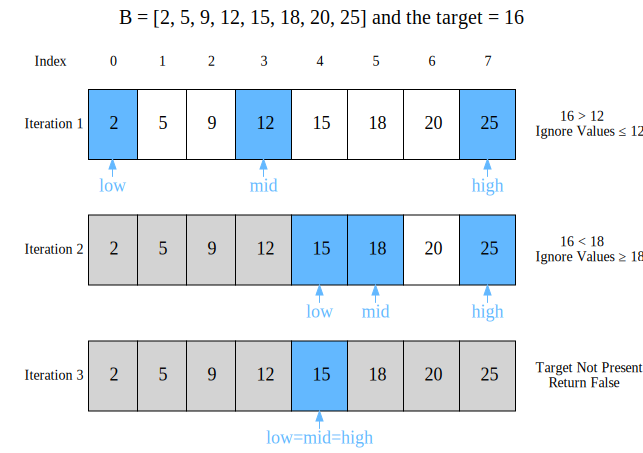

In [4]:
from graphviz import Digraph

# Create Digraph object and set attributes for all nodes & edges which will persist unless 
# a specific attribute set here is updated
s = Digraph('structs', node_attr={'shape': 'plain', 'fontsize': '18'}, 
            edge_attr={'dir': 'back', 'color': 'steelblue1'})

# Set the separation between ranks, i.e., the nodes to be 0.25 inches, set the label of the graph
# to be displayed at the top, adjust the label fontsize, and declare the label.
s.attr(ranksep='0.25', labelloc='t', 
       label='B = [2, 5, 9, 12, 15, 18, 20, 25] and the target = 16', fontsize='20')

# Add node for index and iteration 1 table
s.node('iteration1', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Index</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">0</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">1</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">2</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">3</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">4</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">5</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">6</FONT></TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">7</FONT></TD>
  </TR>
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 1</FONT></TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">2</TD>
    <TD>5</TD>
    <TD>9</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">12</TD>
    <TD>15</TD>
    <TD>18</TD>
    <TD>20</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">16 &gt; 12 <BR/> Ignore Values &le; 12</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 2 table
s.node('iteration2', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 2</FONT></TD>
    <TD BGCOLOR="lightgray">2</TD>
    <TD BGCOLOR="lightgray">5</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD PORT="lowValue" BGCOLOR="steelblue1">15</TD>
    <TD PORT="midValue" BGCOLOR="steelblue1">18</TD>
    <TD>20</TD>
    <TD PORT="highValue" BGCOLOR="steelblue1">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">16 &lt; 18 <BR/> Ignore Values &ge; 18</FONT></TD>
  </TR>
</TABLE>>''')

# Add node for iteration 3 table
s.node('iteration3', '''<
<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" CELLPADDING="20">
  <TR>
    <TD BORDER="0"><FONT POINT-SIZE="14">Iteration 3</FONT></TD>
    <TD BGCOLOR="lightgray">2</TD>
    <TD BGCOLOR="lightgray">5</TD>
    <TD BGCOLOR="lightgray">9</TD>
    <TD BGCOLOR="lightgray">12</TD>
    <TD PORT="lowMidHighValue" BGCOLOR="steelblue1">15</TD>
    <TD BGCOLOR="lightgray">18</TD>
    <TD BGCOLOR="lightgray">20</TD>
    <TD BGCOLOR="lightgray">25</TD>
    <TD BORDER="0"><FONT POINT-SIZE="14">Target Not Present <BR/> Return False</FONT></TD>
  </TR>
</TABLE>>''')

# Update the node fontcolor from the default value of black to steelblue1
s.attr('node', fontcolor='steelblue1')

# Add nodes for iteration 1 labels
s.node('iteration1LowNode', label='low')
s.node('iteration1MidNode', label='mid')
s.node('iteration1HighNode', label='high')

# Add nodes for iteration 2 labels
s.node('iteration2LowNode', label='low')
s.node('iteration2MidNode', label='mid')
s.node('iteration2HighNode', label='high')

# Add nodes for iteration 3 label
s.node('iteration3LowMidHighNode', label='low=mid=high')

# Add edges for each iteration's labels
s.edges([('iteration1:lowValue', 'iteration1LowNode'), 
         ('iteration1:midValue', 'iteration1MidNode'),
         ('iteration1:highValue', 'iteration1HighNode'),
         ('iteration2:lowValue', 'iteration2LowNode'),
         ('iteration2:midValue', 'iteration2MidNode'),
         ('iteration2:highValue', 'iteration2HighNode'),
         ('iteration3:lowMidHighValue', 'iteration3LowMidHighNode')])

# Add invisible edge between iteration 1 high label & the last value in iteration 2 table
# to align iteration 1 table with iteration 2 table
s.edge('iteration1HighNode', 'iteration2:highValue', style='invis')

# Add invisible edge between iteration 2 low label & the fifth value in iteration 3 table 
# to align iteration 2 table with iteration 3 table
s.edge('iteration2LowNode', 'iteration3:lowMidHighValue', style='invis')

# Visualize the graph
s

  * Since the list is the same as the previous example, the initial low and high indices are the same as the previous example, i.e., $lowIndex = 0$ and $highIndex = 7$ which means the initial middle index is also the same, i.e., $midIndex = 3$.<br><br>
  * Now, since the $target > A[midIndex]$ because $16 > A[3] = 12$, the values to the left of and including the current middle value will be ignored in the next iteration by recalculating the low index to be<br><br>
$$lowIndex = midIndex + 1 = 3 + 1 = 4$$<br>
  * During the second iteration the low and high indices are $lowIndex = 4$ and $highIndex = 7$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{4 + 7}{2}\Bigr\rfloor = \Bigl\lfloor5.5\Bigr\rfloor = 5$$<br>
  * Since the $target < A[midIndex]$ because $16 < A[5] = 18$, the values to the right of and including the current middle value will be ignored in the next iteration by recalculating the high index to be<br><br>
$$highIndex = midIndex - 1 = 5 - 1 = 4$$<br>
  * During the third iteration the low and high indices are $lowIndex = 4$ and $highIndex = 4$ and the middle index is recalculated to be<br>
$$midIndex = \Bigl\lfloor\frac{4 + 4}{2}\Bigr\rfloor = \Bigl\lfloor4\Bigr\rfloor = 4$$<br>
  * Since the $target > A[midIndex]$ because 16 > $A[4] = 15$, the low index will be recalculated to be<br><br>
$$lowIndex = midIndex + 1 = 4 + 1 = 5$$<br>
  * Now the $lowIndex > highIndex$ because $5 > 4$, so the search will terminate without finding the target since the search interval $[low, high]$ is empty.

## Recursive Implementation

* Remember that recursion is a technique where a function continues to call itself and repeat its behavior until some condition is met and a result is returned.

* Here, the $binarySearch()$ function will continue to call itself until $A[midIndex]$ is equivalent to the $target$ or until the $lowIndex$ is greater than the $highIndex$, i.e., until the search interval $[lowIndex, highIndex]$ is empty.

Note (3): Other implementations of binary search exist such as an iterative implementation that uses a while loop instead of recursion, an implementation that will always return the leftmost element when searching for an element that is duplicated, e.g., $[1, 3, 5, 5, 5, 7]$ would always return the $5$ at index $2$ when $5$ is the target, and an implementation that will always return the rightmost element when searching for an element that is duplicated, e.g., $[2, 4, 8, 8, 8, 9]$ would always return the $8$ at index $4$ when $8$ is the target.

In [5]:
def binarySearch (A, target, lowIndex, highIndex):
    if highIndex >= lowIndex: 
        midIndex = (lowIndex + highIndex) // 2

        if A[midIndex] == target:
            return True
        
        elif A[midIndex] < target:
            return binarySearch(A, target, midIndex + 1, highIndex) 

        else:
            return binarySearch(A, target, lowIndex, midIndex - 1) 

    else:
        return False

In [6]:
# Code used to call the function and print the result 
A = [1, 4, 7, 9, 12, 14, 18]
target = 7

# The function call assigns the initial lowIndex to be 0 and the initial highIndex to be len(A)-1
foundTarget = binarySearch(A, target, 0, len(A)-1)
  
if foundTarget: 
    print ("Target is in list") 
else: 
    print ("Target is not in list")

Target is in list
